In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In the next code cell, loading the dataset and looking at sample data from it.

In [102]:
studentData = pd.read_csv('exams.csv')
studentData.head(10)

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Cleaning the data

Checking for duplicates within the dataset

In [103]:
duplicate = studentData[studentData.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing


No duplicate rows

For the next cleaning step, checking for any missing values within the dataset

In [104]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


No missing values

# Analysis of the data

## 1. What are the average reading scores for students with/without the test preparation course?

In [106]:
# Creating a dataframe containing the average reading scores for those who took or did not take the preparation course
avg_reading_scores = studentData.groupby('test_prep_course')[['reading']].mean()
avg_reading_scores

,reading
test_prep_course,
completed,73.893855
none,66.534268


From the data above, one can see that the students who took the test preparation course had a better average reading score than those who did not.

Text(0.5, 1.0, 'Average reading scores for students with/without the test preparation course')

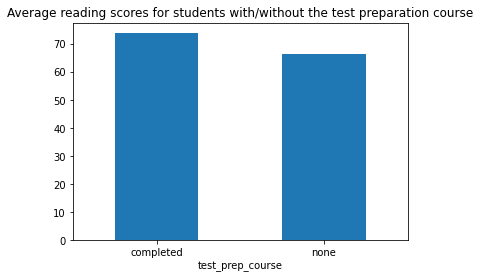

In [107]:
# plotting the average reading scores visualization for the took test/didn't take test students
avg_reading_scores["reading"].plot(x="test_prep_course", kind="bar",rot=0)
plt.title("Average reading scores for students with/without the test preparation course")

## 2. The average scores for the different parental education levels

In [108]:
# Creating a dataframe containing the average test scores for the different education levels
avg_parent_education_scores = studentData.groupby('parent_education_level')[['reading','math','writing']].mean()
avg_parent_education_scores

,reading,math,writing
parent_education_level,,,
associate's degree,70.927928,67.882883,69.896396
bachelor's degree,73.000000,69.389831,73.381356
high school,64.704082,62.137755,62.448980
master's degree,75.372881,69.745763,75.677966
some college,69.460177,67.128319,68.840708
some high school,66.938547,63.497207,64.888268


Text(0, 0.5, 'Average Scores')

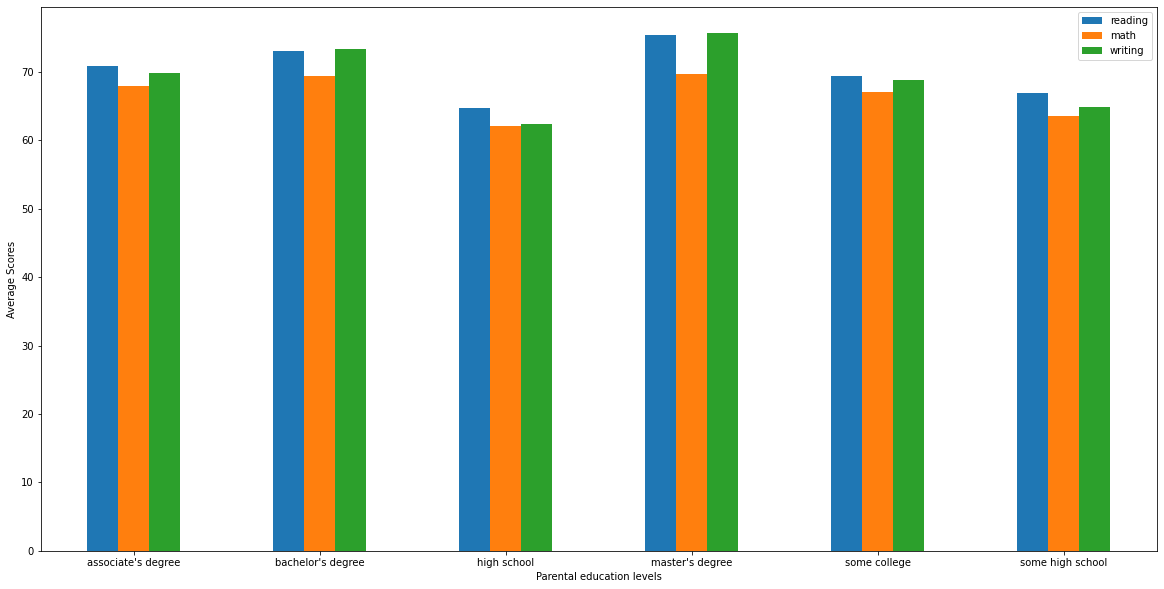

In [109]:
ax = avg_parent_education_scores.plot(kind="bar",figsize=(20, 10),rot=0)

ax.set_xlabel("Parental education levels")
ax.set_ylabel("Average Scores")

From the graph above, once can see that the average test scores for students whose parents have a master's degree is higher than the other education levels.
Students whose parents who have a high school education level have the least average test scores for the various education levels.

Reading seems to be the best done test across the different education levels.
One can also notice that for all education levels, the test scores for math is less than the other tests and so this means that generally, the students are not doing as well in math as in the other subjects, regardless of the education levels.


## 4. Compare the average scores for students with/without the test preparation course for different parental education levels 


In [110]:
studentData

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [111]:
#creating a dataframe called test_subgroup that contains the average test 
# scores for the students who either took the test 
#or didn't, taking into consideration their parental education levels

test_subgroup = studentData.groupby(['test_prep_course','parent_education_level'])[['reading','writing','math']].mean()
test_subgroup

reading    writing       math
test_prep_course parent_education_level                                 
completed        associate's degree      76.170732  76.817073  71.829268
                 bachelor's degree       76.739130  78.695652  73.282609
                 high school             67.839286  68.053571  65.000000
                 master's degree         78.250000  80.100000  70.600000
                 some college            75.987013  76.519481  71.454545
                 some high school        70.948052  70.363636  66.701299
none             associate's degree      67.857143  65.842857  65.571429
                 bachelor's degree       70.611111  69.986111  66.902778
                 high school             63.450000  60.207143  60.992857
                 master's degree         73.897436  73.410256  69.307692
                 some college            66.087248  64.872483  64.892617
                 some high school        63.911765  60.754902  61.078431

In [112]:
# separating the test_subgroup dataframe into two smaller dataframes:
# first dataframe, tookPrepCourse, contains the students who took the test prep course
# second dataframe, noPrepCourse, contains the students who didn't take the test prep course


tookPrepCourse = test_subgroup.loc[['completed']]
print(tookPrepCourse)

noPrepCourse = test_subgroup.loc[['none']]
print(noPrepCourse)

                                           reading    writing       math
test_prep_course parent_education_level                                 
completed        associate's degree      76.170732  76.817073  71.829268
                 bachelor's degree       76.739130  78.695652  73.282609
                 high school             67.839286  68.053571  65.000000
                 master's degree         78.250000  80.100000  70.600000
                 some college            75.987013  76.519481  71.454545
                 some high school        70.948052  70.363636  66.701299
                                           reading    writing       math
test_prep_course parent_education_level                                 
none             associate's degree      67.857143  65.842857  65.571429
                 bachelor's degree       70.611111  69.986111  66.902778
                 high school             63.450000  60.207143  60.992857
                 master's degree         73.897436 

In [113]:
#dropping the first level index, test_prep_course, from the multilevel index of both smaller
#dataframes so that there is only one index for easier graph plotting

tookPrepCourse = tookPrepCourse.reset_index(level=0, drop=True)
print(tookPrepCourse)

noPrepCourse = noPrepCourse.reset_index(level=0, drop=True)
print(noPrepCourse)

                          reading    writing       math
parent_education_level                                 
associate's degree      76.170732  76.817073  71.829268
bachelor's degree       76.739130  78.695652  73.282609
high school             67.839286  68.053571  65.000000
master's degree         78.250000  80.100000  70.600000
some college            75.987013  76.519481  71.454545
some high school        70.948052  70.363636  66.701299
                          reading    writing       math
parent_education_level                                 
associate's degree      67.857143  65.842857  65.571429
bachelor's degree       70.611111  69.986111  66.902778
high school             63.450000  60.207143  60.992857
master's degree         73.897436  73.410256  69.307692
some college            66.087248  64.872483  64.892617
some high school        63.911765  60.754902  61.078431


In [114]:
#transposing the 'tookPrepCourse' and 'noPrepCourse' dataframes so that I can plot
# the average scores for each test together and compare the average parental education
#levels for each test taken by the students.

transposedTookPrepCourse = tookPrepCourse.T
transposedTookPrepCourse

noTookPrepCourse = noPrepCourse.T
noTookPrepCourse

parent_education_level,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
reading,67.857143,70.611111,63.450000,73.897436,66.087248,63.911765
writing,65.842857,69.986111,60.207143,73.410256,64.872483,60.754902
math,65.571429,66.902778,60.992857,69.307692,64.892617,61.078431


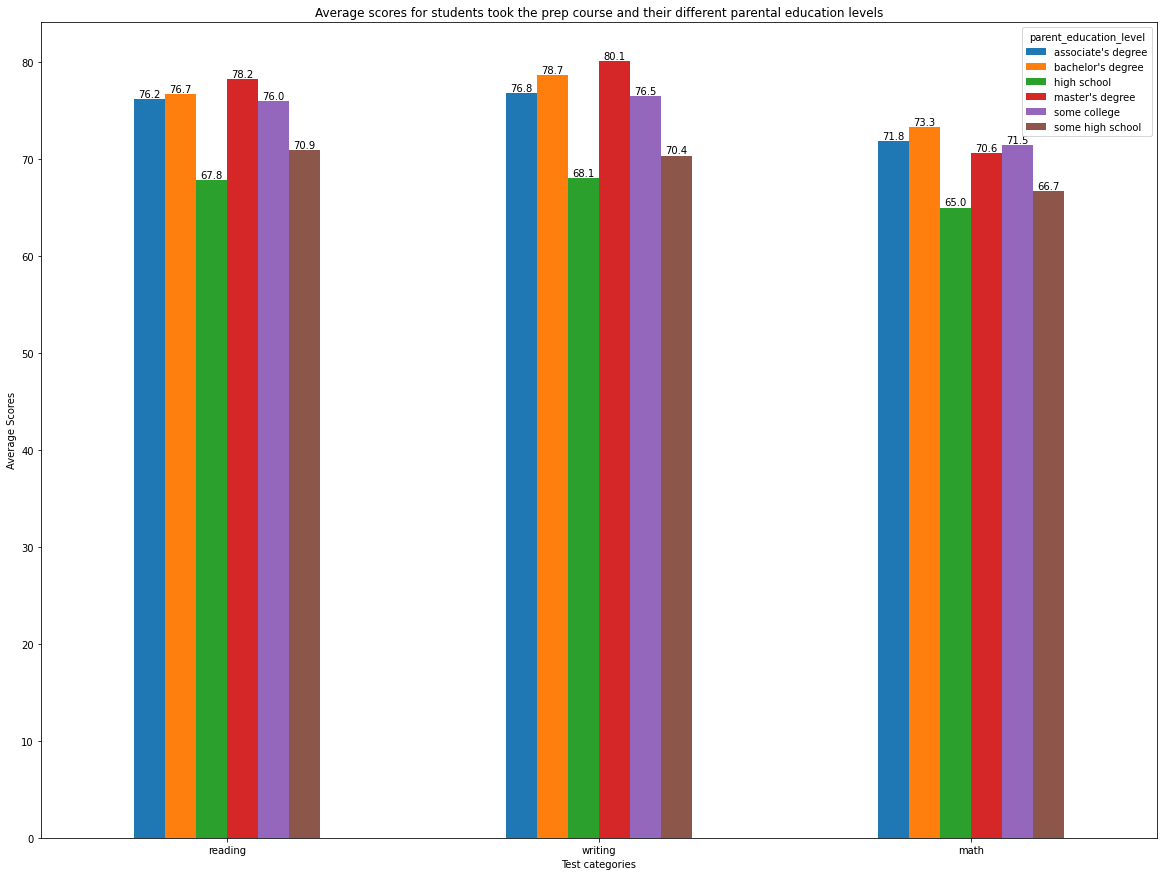

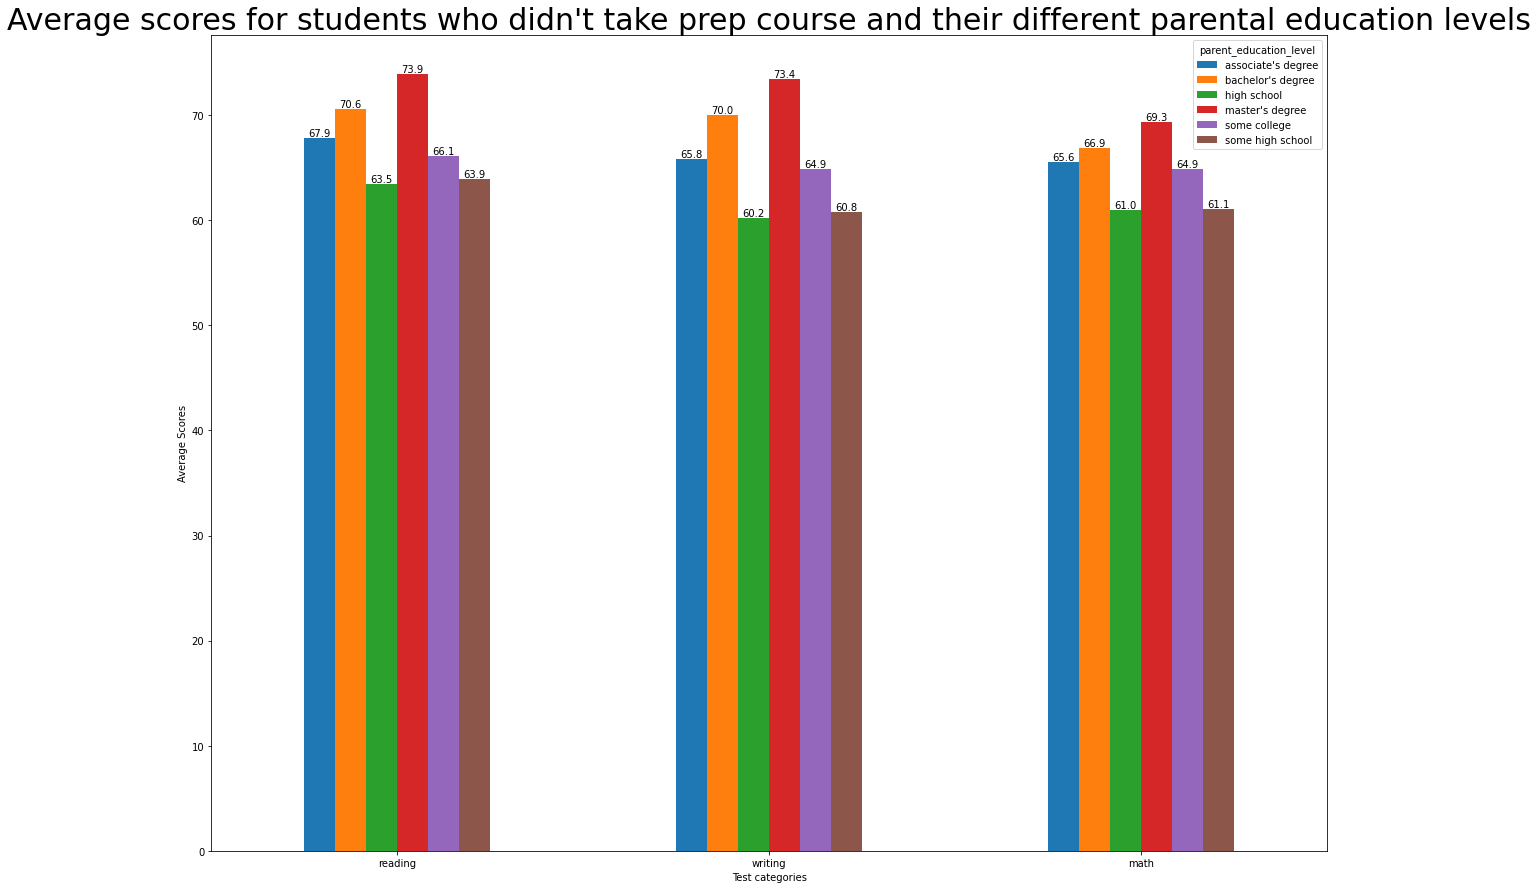

In [128]:
#plotting the transposed dataframes

completedPrep = transposedTookPrepCourse.plot(kind="bar",figsize=(20, 15),rot=0)

completedPrep.set_title("Average scores for students took the prep course and their different parental education levels")
completedPrep.set_xlabel("Test categories")
completedPrep.set_ylabel("Average Scores")
for container in completedPrep.containers:
    completedPrep.bar_label(container, fmt='%.1f')

NoPrep = noTookPrepCourse.plot(kind="bar",figsize=(20, 15),rot=0)

NoPrep.set_title("Average scores for students who didn't take prep course and their different parental education levels")
NoPrep.set_xlabel("Test categories")
NoPrep.set_ylabel("Average Scores")
for container in NoPrep.containers:
    NoPrep.bar_label(container, fmt='%.1f')

According to the graphs above, one can notice that for all test categories across the different education levels, students who took the test preparation course had a higher average score than their counterparts who did not take the score.
Although there is an interesting observation via the difference in average scores and I would like to take a closer look.

In [116]:
differenceInAverages = transposedTookPrepCourse.subtract(noTookPrepCourse)
differenceInAverages

parent_education_level,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
reading,8.313589,6.128019,4.389286,4.352564,9.899765,7.036287
writing,10.974216,8.709541,7.846429,6.689744,11.646997,9.608734
math,6.257840,6.379831,4.007143,1.292308,6.561928,5.622867


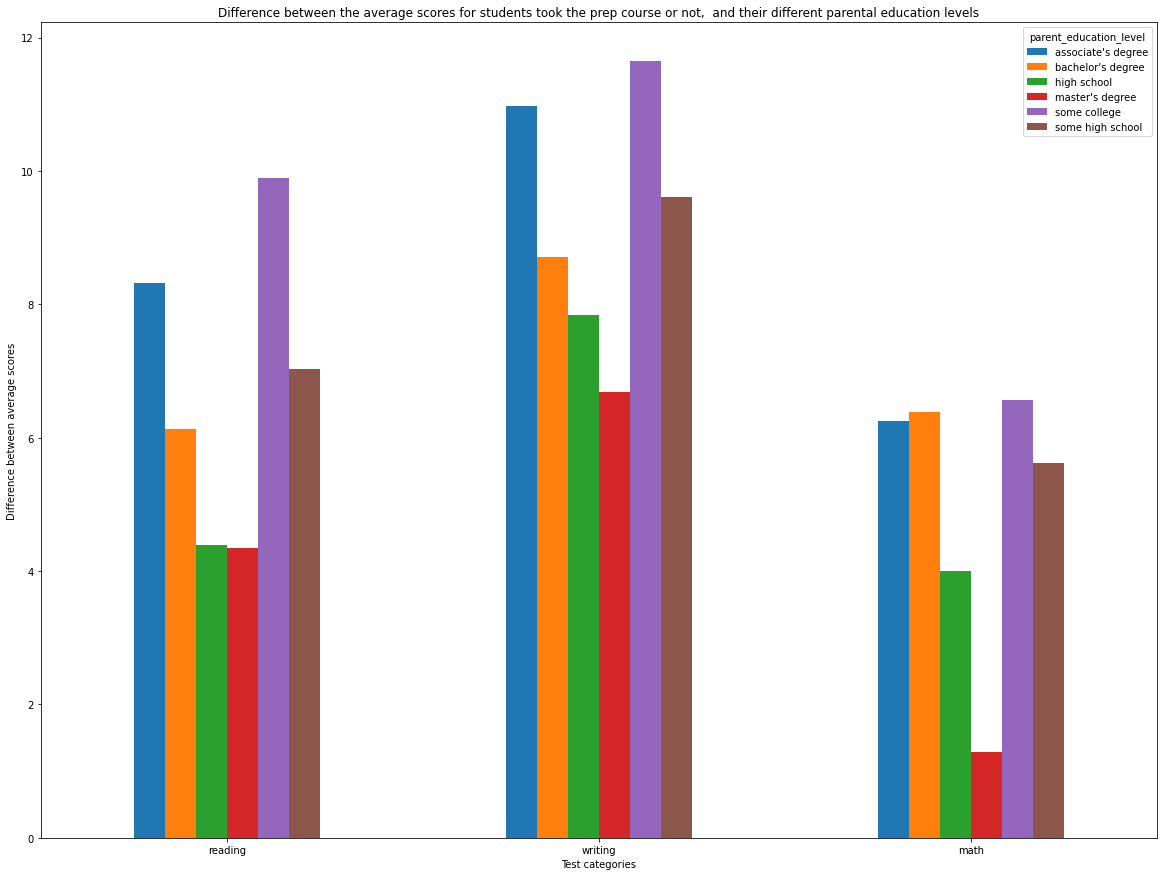

In [117]:
difference = differenceInAverages.plot(kind="bar",figsize=(20, 15),rot=0)

difference.set_title("Difference between the average scores for students took the prep course or not,  and their different parental education levels")
difference.set_xlabel("Test categories")
difference.set_ylabel("Difference between average scores")
for container in completedPrep.containers:
    completedPrep.bar_label(container, fmt='%.1f')

In the graph above, I have made a visualization showing the difference between the average scores of students who took the preparation course versus those who didn't for the various parental education levels. In simpler terms, for the children who parents finished high school only with some child doing the prep course and others not , what is the difference between the average reading scores of these two children?

-
------------------------------------------------------------------------------------------------

Taking a difference of 5 or greater as significant since this usually means a difference in grade i.e someone who has a C+ and gets 5 more marks may get a new grade of a B-.

-
------------------------------------------------------------------------------------------------

So the interesting thing I noticed was that for math, the average reading scores for the children who took the prep course and who did not had a slight margin. This means that taking the prep course may not impact the student's math scores that much. The impact of the prep course seems to be much less via the math test for students whose parents hold a master's degree.
However, the difference between math scores of students whose parents are of "some college", "bachelor's degree" ,"associate's degree" and "some high school" is somewhat significant and so these students may need the math test prep course the most.

-
------------------------------------------------------------------------------------------------

One can also notice, the test preparation course seems to have a greater impact on student's writing scores, out of all the tests. The difference for all parental levels of education is greater than 5 and I find this interesting. The impact seems to be the greatest on students whose parents have an education level of "some college", followed by "associate's degree". One could say these students may need the writing test prep more but looking through all the tests, the test prep course looks to be helpful to all students regardless of their parent's education levels.

-
------------------------------------------------------------------------------------------------

Via the reading test, for students of parents with "some college","associate's degree","some high school" and "bachelor's degree", the difference between the average scores after taking the test prep or no prep is significant and therefore these students may need the reading test prep more.

## 5. The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

In [129]:
studentData = studentData[['math','reading','writing']]
studentData

,math,reading,writing
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


From my point of view of 'performing well', I took the students who scored 80 and above in a test

### Students who perform well in math

In [139]:
mathGreats = studentData.query("math > 80")
mathGreats


,math,reading,writing
2,90,95,93
6,88,95,92
16,88,89,86
34,97,87,82
35,81,81,79
...,...,...,...
979,91,95,94
981,81,78,78
987,81,75,76
990,86,81,75


In [131]:
mathGreats.corr(method ='pearson',numeric_only="True")

,math,reading,writing
math,1.000000,0.462581,0.413456
reading,0.462581,1.000000,0.883358
writing,0.413456,0.883358,1.000000


Text(0.5, 1.0, 'Correlation between the students who do well in maths and their tests in other scores')

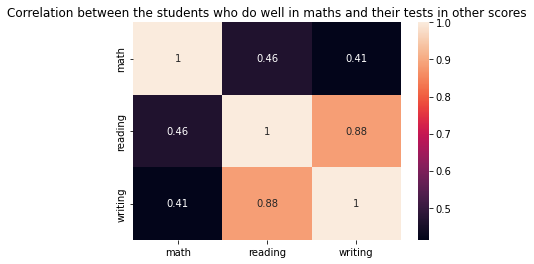

In [141]:
maps = mathGreats.corr(method ='pearson',numeric_only="True")
sns.heatmap(maps, annot=True)
plt.title('Correlation between the students who do well in maths and their tests in other scores')

From the correlation values above, the following conclusions can be made about students who perform well in maths
1. Students who do well in maths have their reading scores a bit farther from their math scores.
2. Students who do well in maths have their writing scores also farther from their math scores.

### Students who perform well in reading

In [145]:
readingGreats = studentData.query("reading > 80")
readingGreats

,math,reading,writing
1,69,90,88
2,90,95,93
5,71,83,78
6,88,95,92
12,65,81,73
...,...,...,...
989,67,86,83
990,86,81,75
991,65,82,78
995,88,99,95


In [146]:
readingGreats.corr(method ='pearson',numeric_only="True")

,math,reading,writing
math,1.000000,0.518973,0.466912
reading,0.518973,1.000000,0.781316
writing,0.466912,0.781316,1.000000


Text(0.5, 1.0, 'Correlation between the students who do well in reading and their tests in other scores')

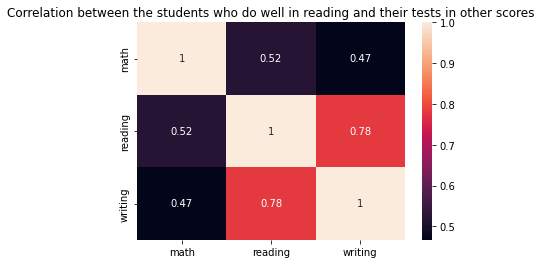

In [147]:
maps = readingGreats.corr(method ='pearson',numeric_only="True")
sns.heatmap(maps, annot=True)
plt.title('Correlation between the students who do well in reading and their tests in other scores')

From the correlation values above, the following conclusions can be made about students who perform well in reading
1. Students who do well in reading have their writing scores very close to their good reading scores.
2. Students who do well in reading have their math scores close to their reading scores but not as close as their writing scores.

### Students who perform well in writing

In [148]:
writingGreats = studentData.query("writing > 80")
writingGreats

,math,reading,writing
1,69,90,88
2,90,95,93
6,88,95,92
16,88,89,86
34,97,87,82
...,...,...,...
983,78,87,91
984,74,75,82
989,67,86,83
995,88,99,95


In [149]:
writingGreats.corr(method ='pearson',numeric_only="True")

,math,reading,writing
math,1.000000,0.567256,0.550497
reading,0.567256,1.000000,0.783818
writing,0.550497,0.783818,1.000000


Text(0.5, 1.0, 'Correlation between the students who do well in reading and their tests in other scores')

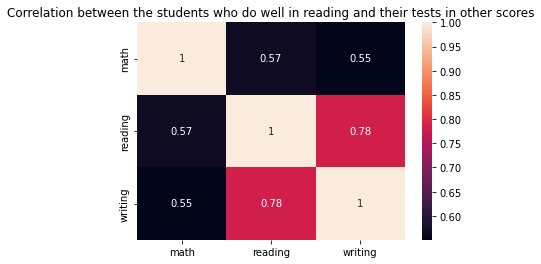

In [144]:
maps = writingGreats.corr(method ='pearson',numeric_only="True")
sns.heatmap(maps, annot=True)
plt.title('Correlation between the students who do well in reading and their tests in other scores')

From the correlation values above, the following conclusions can be made about students who perform well in reading
1. Students who do well in writing have their reading scores very close to their good writing scores.
2. Students who do well in writing have their math scores close to the writing scores but not as close as the reading scores.

### Summary of findings
1. Generally, doing the test preparation course will results in better test scores for a student.
2. Students whose parents have an education level of a master's degree are performing the best within the school and the least average scores are achieved by the children of parents with 'high school level'
3. The test preparation score is helping students mainly with the writing test and least with the math test.
4. Students of parental education level "some college" are benefitting the most from the test preparation course